In [ ]:
import ee
import geopandas as gpd
import matplotlib.pyplot as plt

import agrigee_lite as agl

In [2]:
ee.Initialize(opt_url="https://earthengine-highvolume.googleapis.com", project="ee-paulagibrim")

In [3]:
gdf = gpd.read_parquet("data/sample.parquet")
row = gdf.iloc[1]

In [9]:
sats = [agl.sat.Sentinel2(bands=["red", "nir"]), agl.sat.Landsat7(bands=["red", "nir"]), agl.sat.Landsat8(bands=["red", "nir"])]
colors = ["green", "blue", "purple"]

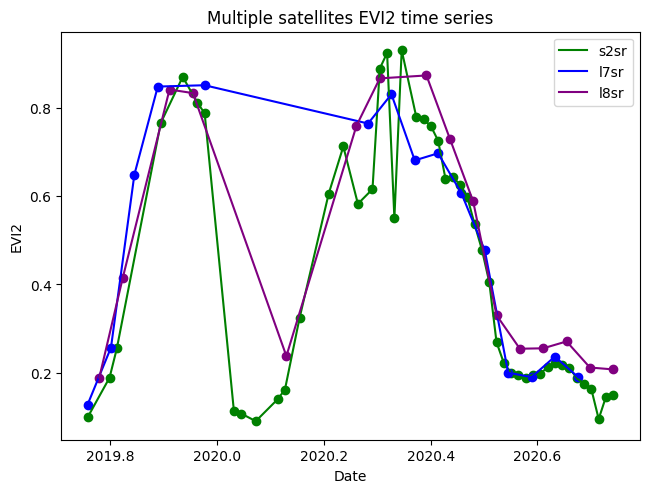

In [14]:
_, ax = plt.subplots()

row = gdf.iloc[2]

for sat, color in zip(sats, colors, strict=False):
    agl.vis.sits(row.geometry, row.start_date, row.end_date, sat, "evi2", axis=ax, color=color)

plt.tight_layout()
plt.legend()

plt.title("Multiple satellites EVI2 time series")
plt.xlabel("Date")
plt.ylabel("EVI2")
ax.ticklabel_format(useOffset=False)

plt.show()